In [2]:
# урок https://www.youtube.com/watch?v=NLVLB_NqKX8


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
mnist_train = pd.read_csv("mnist_train.csv", header=None)
mnist_test = pd.read_csv("mnist_test.csv", header=None)

In [6]:
mnist_train.shape, mnist_test.shape

((60000, 785), (10000, 785))

In [4]:
cols = ["label"]
for i in range(784):
    cols.append(f"px_{i+1}")

In [10]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
mnist_test.columns = cols
mnist_train.columns = cols

In [6]:
mnist_test.head(5)

,label,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_775,px_776,px_777,px_778,px_779,px_780,px_781,px_782,px_783,px_784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
image_row = mnist_train.values[10, 1:]

In [14]:
image_row.shape

(784,)

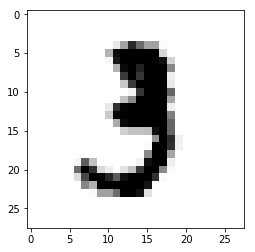

In [18]:
plt.imshow(image_row.reshape(28, 28), cmap="Greys")

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
train_data = mnist_train.values[:, 1:]
test_data = mnist_test.values[:, 1:]

In [9]:
train_label = mnist_train.values[:, 0]
test_label = mnist_test.values[:, 0]

In [24]:
print(train_data.shape, test_data.shape)

(60000, 784) (10000, 784)


In [25]:
print(train_label.shape, test_label.shape)

(60000,) (10000,)


In [26]:
kn_classifier = KNeighborsClassifier(n_jobs=-1)

In [27]:
kn_classifier = kn_classifier.fit(train_data, train_label)

На рисунке представлена цифра 0


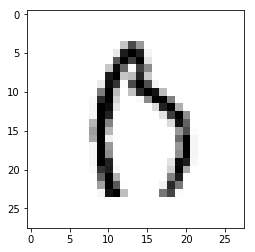

In [35]:
test_id = 324
plt.imshow(test_data[test_id, :].reshape(28, 28), cmap="Greys")
print("На рисунке представлена цифра {}".format(test_label[test_id]))

In [36]:
kn_classifier.predict(test_data[test_id, :].reshape(1, 784))

array([0], dtype=int64)

In [10]:
from sklearn.metrics import accuracy_score

In [38]:
kn_predictions = kn_classifier.predict(test_data)

In [39]:
accuracy_score(test_label, kn_predictions)

0.9688

In [11]:
from sklearn.neural_network import MLPClassifier

In [41]:
mlp_classifier = MLPClassifier(verbose=True)

In [70]:
mlp_classifier = mlp_classifier.fit(train_data, train_label)

Iteration 1, loss = 2.62519426
Iteration 2, loss = 0.92588744
Iteration 3, loss = 0.54055531
Iteration 4, loss = 0.36465108
Iteration 5, loss = 0.28175021
Iteration 6, loss = 0.23152693


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


На рисунке представлена цифра 4


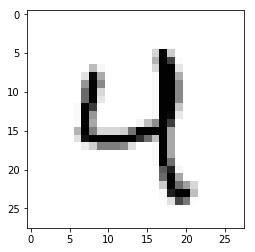

In [43]:
test_id = 3232
plt.imshow(test_data[test_id, :].reshape(28, 28), cmap="Greys")
print("На рисунке представлена цифра {}".format(test_label[test_id]))

In [44]:
mlp_classifier.predict(test_data[test_id, :].reshape(1, 784))

array([4], dtype=int64)

In [47]:
mlp_predictions = mlp_classifier.predict(test_data)

In [48]:
accuracy_score(test_label, mlp_predictions)

0.9679

In [49]:
# ДЗ: постараться достигнуть бОльшей точности за счет изменения параметров нейронной сети
# критерий оценивания 1: Accuracy
# критерий оценивания 2: качество и полноста исследования

In [92]:
def testMlp(**kwargs):
    mlp_classifier = MLPClassifier(**kwargs)
    mlp_classifier = mlp_classifier.fit(train_data, train_label)
    mlp_predictions = mlp_classifier.predict(test_data)
    accuracy_score(test_label, mlp_predictions)

In [36]:
mlp_classifier = MLPClassifier(verbose=True, hidden_layer_sizes=(500,), max_iter=1000)
mlp_classifier = mlp_classifier.fit(train_data, train_label)

Iteration 1, loss = 1.82939321
Iteration 2, loss = 0.59867479
Iteration 3, loss = 0.35520272
Iteration 4, loss = 0.23349950
Iteration 5, loss = 0.16227329
Iteration 6, loss = 0.15493143
Iteration 7, loss = 0.15444018
Iteration 8, loss = 0.12363278
Iteration 9, loss = 0.11844460
Iteration 10, loss = 0.13508640
Iteration 11, loss = 0.14934861
Iteration 12, loss = 0.14392884
Iteration 13, loss = 0.14052629
Iteration 14, loss = 0.10846057
Iteration 15, loss = 0.10422101
Iteration 16, loss = 0.13046089
Iteration 17, loss = 0.12888818
Iteration 18, loss = 0.11331778
Iteration 19, loss = 0.14197466
Iteration 20, loss = 0.12741205
Iteration 21, loss = 0.10125910
Iteration 22, loss = 0.09810281
Iteration 23, loss = 0.12030354
Iteration 24, loss = 0.10819351
Iteration 25, loss = 0.10561487
Iteration 26, loss = 0.13949409
Iteration 27, loss = 0.08574930
Iteration 28, loss = 0.06462235
Iteration 29, loss = 0.07476812
Iteration 30, loss = 0.09284999
Iteration 31, loss = 0.10881329
Iteration 32, los

In [37]:
mlp_predictions = mlp_classifier.predict(test_data)
accuracy_score(test_label, mlp_predictions)

0.9766

0.8966